## Spotify Analysis Dataset 2025 

In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import  seaborn as ans 
from sklearn.linear_model import LinearRegression

In [248]:
data = pd.read_csv("spotify_churn_dataset.csv")
data 

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [249]:
data.shape

(8000, 12)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [251]:
data.drop(columns=["gender","country","subscription_type","device_type","user_id"],axis=1,inplace=True)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    8000 non-null   int64  
 1   listening_time         8000 non-null   int64  
 2   songs_played_per_day   8000 non-null   int64  
 3   skip_rate              8000 non-null   float64
 4   ads_listened_per_week  8000 non-null   int64  
 5   offline_listening      8000 non-null   int64  
 6   is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 437.6 KB


In [253]:
data.isnull().sum()

age                      0
listening_time           0
songs_played_per_day     0
skip_rate                0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [254]:
data.duplicated().sum()

0

In [255]:
data.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


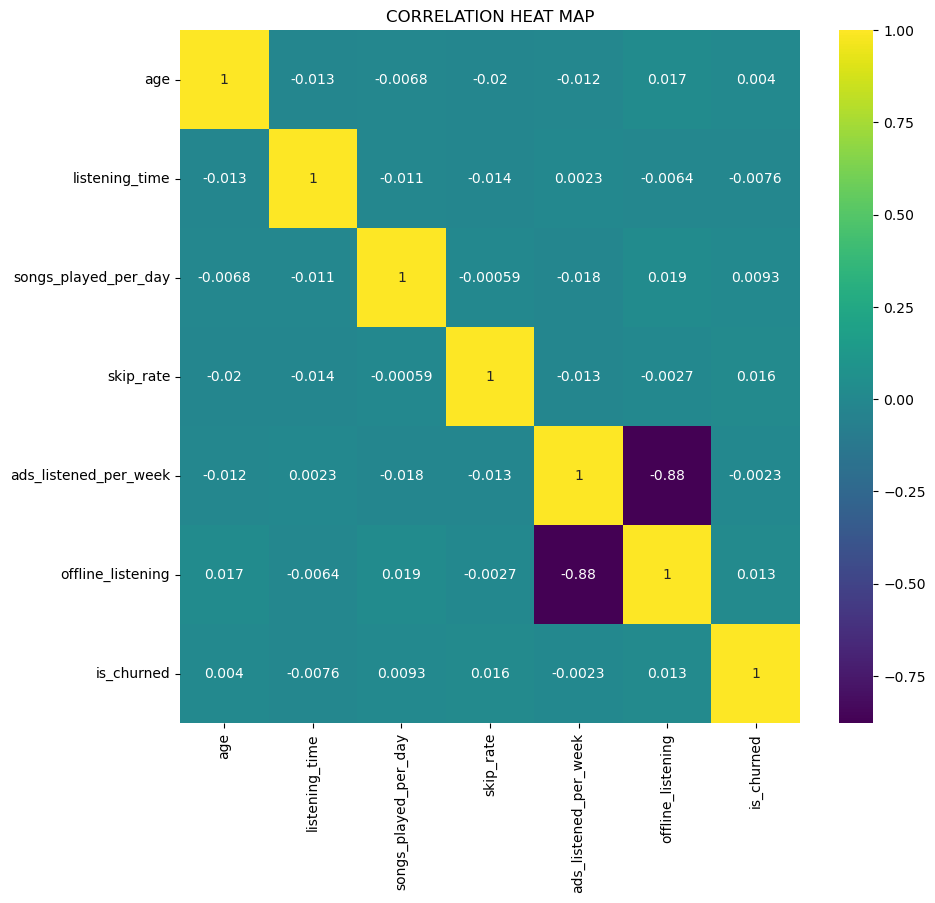

In [256]:
# Correlation map 

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(10,9))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="viridis")
plt.title("CORRELATION HEAT MAP")
plt.show()

In [257]:
data.drop("ads_listened_per_week",axis=1,inplace=True)

In [258]:
data

,age,listening_time,songs_played_per_day,skip_rate,offline_listening,is_churned
0,54,26,23,0.20,0,1
1,33,141,62,0.34,1,0
2,38,199,38,0.04,1,1
3,22,36,2,0.31,1,0
4,29,250,57,0.36,1,1
...,...,...,...,...,...,...
7995,44,237,36,0.30,1,1
7996,34,61,64,0.59,1,0
7997,17,81,62,0.33,0,0
7998,34,245,94,0.27,1,0


In [259]:
data.tail()

,age,listening_time,songs_played_per_day,skip_rate,offline_listening,is_churned
7995,44,237,36,0.30,1,1
7996,34,61,64,0.59,1,0
7997,17,81,62,0.33,0,0
7998,34,245,94,0.27,1,0
7999,45,210,68,0.46,0,0


In [260]:
x = data.drop(columns=["is_churned"])
y =data["is_churned"]

In [261]:
x

,age,listening_time,songs_played_per_day,skip_rate,offline_listening
0,54,26,23,0.20,0
1,33,141,62,0.34,1
2,38,199,38,0.04,1
3,22,36,2,0.31,1
4,29,250,57,0.36,1
...,...,...,...,...,...
7995,44,237,36,0.30,1
7996,34,61,64,0.59,1
7997,17,81,62,0.33,0
7998,34,245,94,0.27,1


In [262]:
y

0       1
1       0
2       1
3       0
4       1
       ..
7995    1
7996    0
7997    0
7998    0
7999    0
Name: is_churned, Length: 8000, dtype: int64

In [263]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [264]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [265]:
x_train

array([[-0.05515228, -0.2197806 , -0.1077059 ,  0.68391782,  0.57710971],
       [ 0.65111075,  0.93608727,  0.17386378, -1.67237581,  0.57710971],
       [-1.15378366, -1.64972024, -0.24849074, -0.2356114 ,  0.57710971],
       ...,
       [ 0.65111075,  1.17441054,  0.34984482,  0.05174148,  0.57710971],
       [-1.62462567, -0.20786444,  0.27945241,  1.201153  ,  0.57710971],
       [ 1.12195277, -1.70930105, -1.58594671, -1.4424935 ,  0.57710971]])

In [266]:
x_test

array([[-1.31073099,  0.36411141, -0.98761114,  0.56897666,  0.57710971],
       [-1.15378366,  0.95991959, -1.40996566,  0.45403551,  0.57710971],
       [ 1.35737378, -1.43522929,  1.51131974, -1.2126112 ,  0.57710971],
       ...,
       [ 1.35737378,  0.31644676,  1.51131974,  1.71838819, -1.7327728 ],
       [-0.5259943 ,  1.62722475,  0.03307894,  0.45403551, -1.7327728 ],
       [ 0.18026873, -1.6616364 ,  0.03307894, -1.49996408,  0.57710971]])

In [267]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(x_train,y_train) 

LogisticRegression()

In [268]:
y_pred = mdl.predict(x_test)

In [269]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [270]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score,f1_score

print("Accuracy",accuracy_score(y_test,y_pred))
print("\nConfusionMatrix",confusion_matrix(y_test,y_pred))
print("\nClassification_report",classification_report(y_test,y_pred))
print("\nPrecision",precision_score(y_test,y_pred))
print("\nRecall",recall_score(y_test,y_pred))
print("\nf1_Score",f1_score(y_test,y_pred))

Accuracy 0.75

ConfusionMatrix [[1200    0]
 [ 400    0]]

Classification_report               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1200
           1       0.00      0.00      0.00       400

    accuracy                           0.75      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600


Precision 0.0

Recall 0.0

f1_Score 0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packag

In [271]:
import pickle 

with open("Spotify.pkl","wb") as file:
    pickle.dump(mdl,file)

In [272]:
import pickle 

with open("Spotify.pkl","rb") as file:
    load_mdl = pickle.load(file)